In [1]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")
import matplotlib.pyplot as plt 

dj.blob.use_32bit_dims = True  # necessary for pd.blob read
import pandas as pd
import behav_viz.ingest as ingest
import behav_viz.visualize as viz
FIGURES_PATH = ingest.dir_utils.get_figures_path("rats", "beta_fixationgrower")

# settings
%load_ext autoreload
%autoreload 2

[2024-07-30 16:14:47,308][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-30 16:14:48,650][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
beta_1 = [
    "R033",
    "R039",
    "R010",
    "R012",
]
date_min = "2024-07-09"
today = datetime.today().date()
date_max = today.strftime("%Y-%m-%d")

trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_1, date_min=date_min
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_1, date_min=date_min, date_max=date_max, verbose=True
)

beta_2 = [
    "R034",
    "R036",
]

date_min = "2024-07-22"

trials_df2 = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_2, date_min=date_min
)
days_df2 = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_2, date_min=date_min, date_max=date_max, verbose=True
)

trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)
days_df = pd.concat([days_df, days_df2], ignore_index=True)

animal_id R033
Fetched 20 dates from Sessions table from 2024-07-09 to 2024-07-29 for R033

animal_id R039
Fetched 20 dates from Sessions table from 2024-07-09 to 2024-07-29 for R039

animal_id R010
Fetched 21 dates from Sessions table from 2024-07-09 to 2024-07-30 for R010

animal_id R012
Fetched 21 dates from Sessions table from 2024-07-09 to 2024-07-30 for R012

Fetched data from SessionAggDate table from 2024-07-09 to 2024-07-29  
	Last date on the database is 2024-07-29 but user is querying data 
	for 2024-07-30. Attempting to manually aggregate today's data.
Today's, 2024-07-30, data exits and has been added to SessionAggDate.

80 daily summaries fetched for animals: 
['R033', 'R039', 'R010', 'R012']
between 2024-07-09 and 2024-07-30
animal_id R034
Not all variables are the same length. Cannot create proper DataFrame
result: 42
hits: 42
violations: 42
temperror: 42
hit_rate: 41
error_rate: 41
violation_rate: 41
temp_error_rate: 41
n_lpokes: 41
n_cpokes: 41
n_rpokes: 41
trial_dur:

## Somme bug here for R036

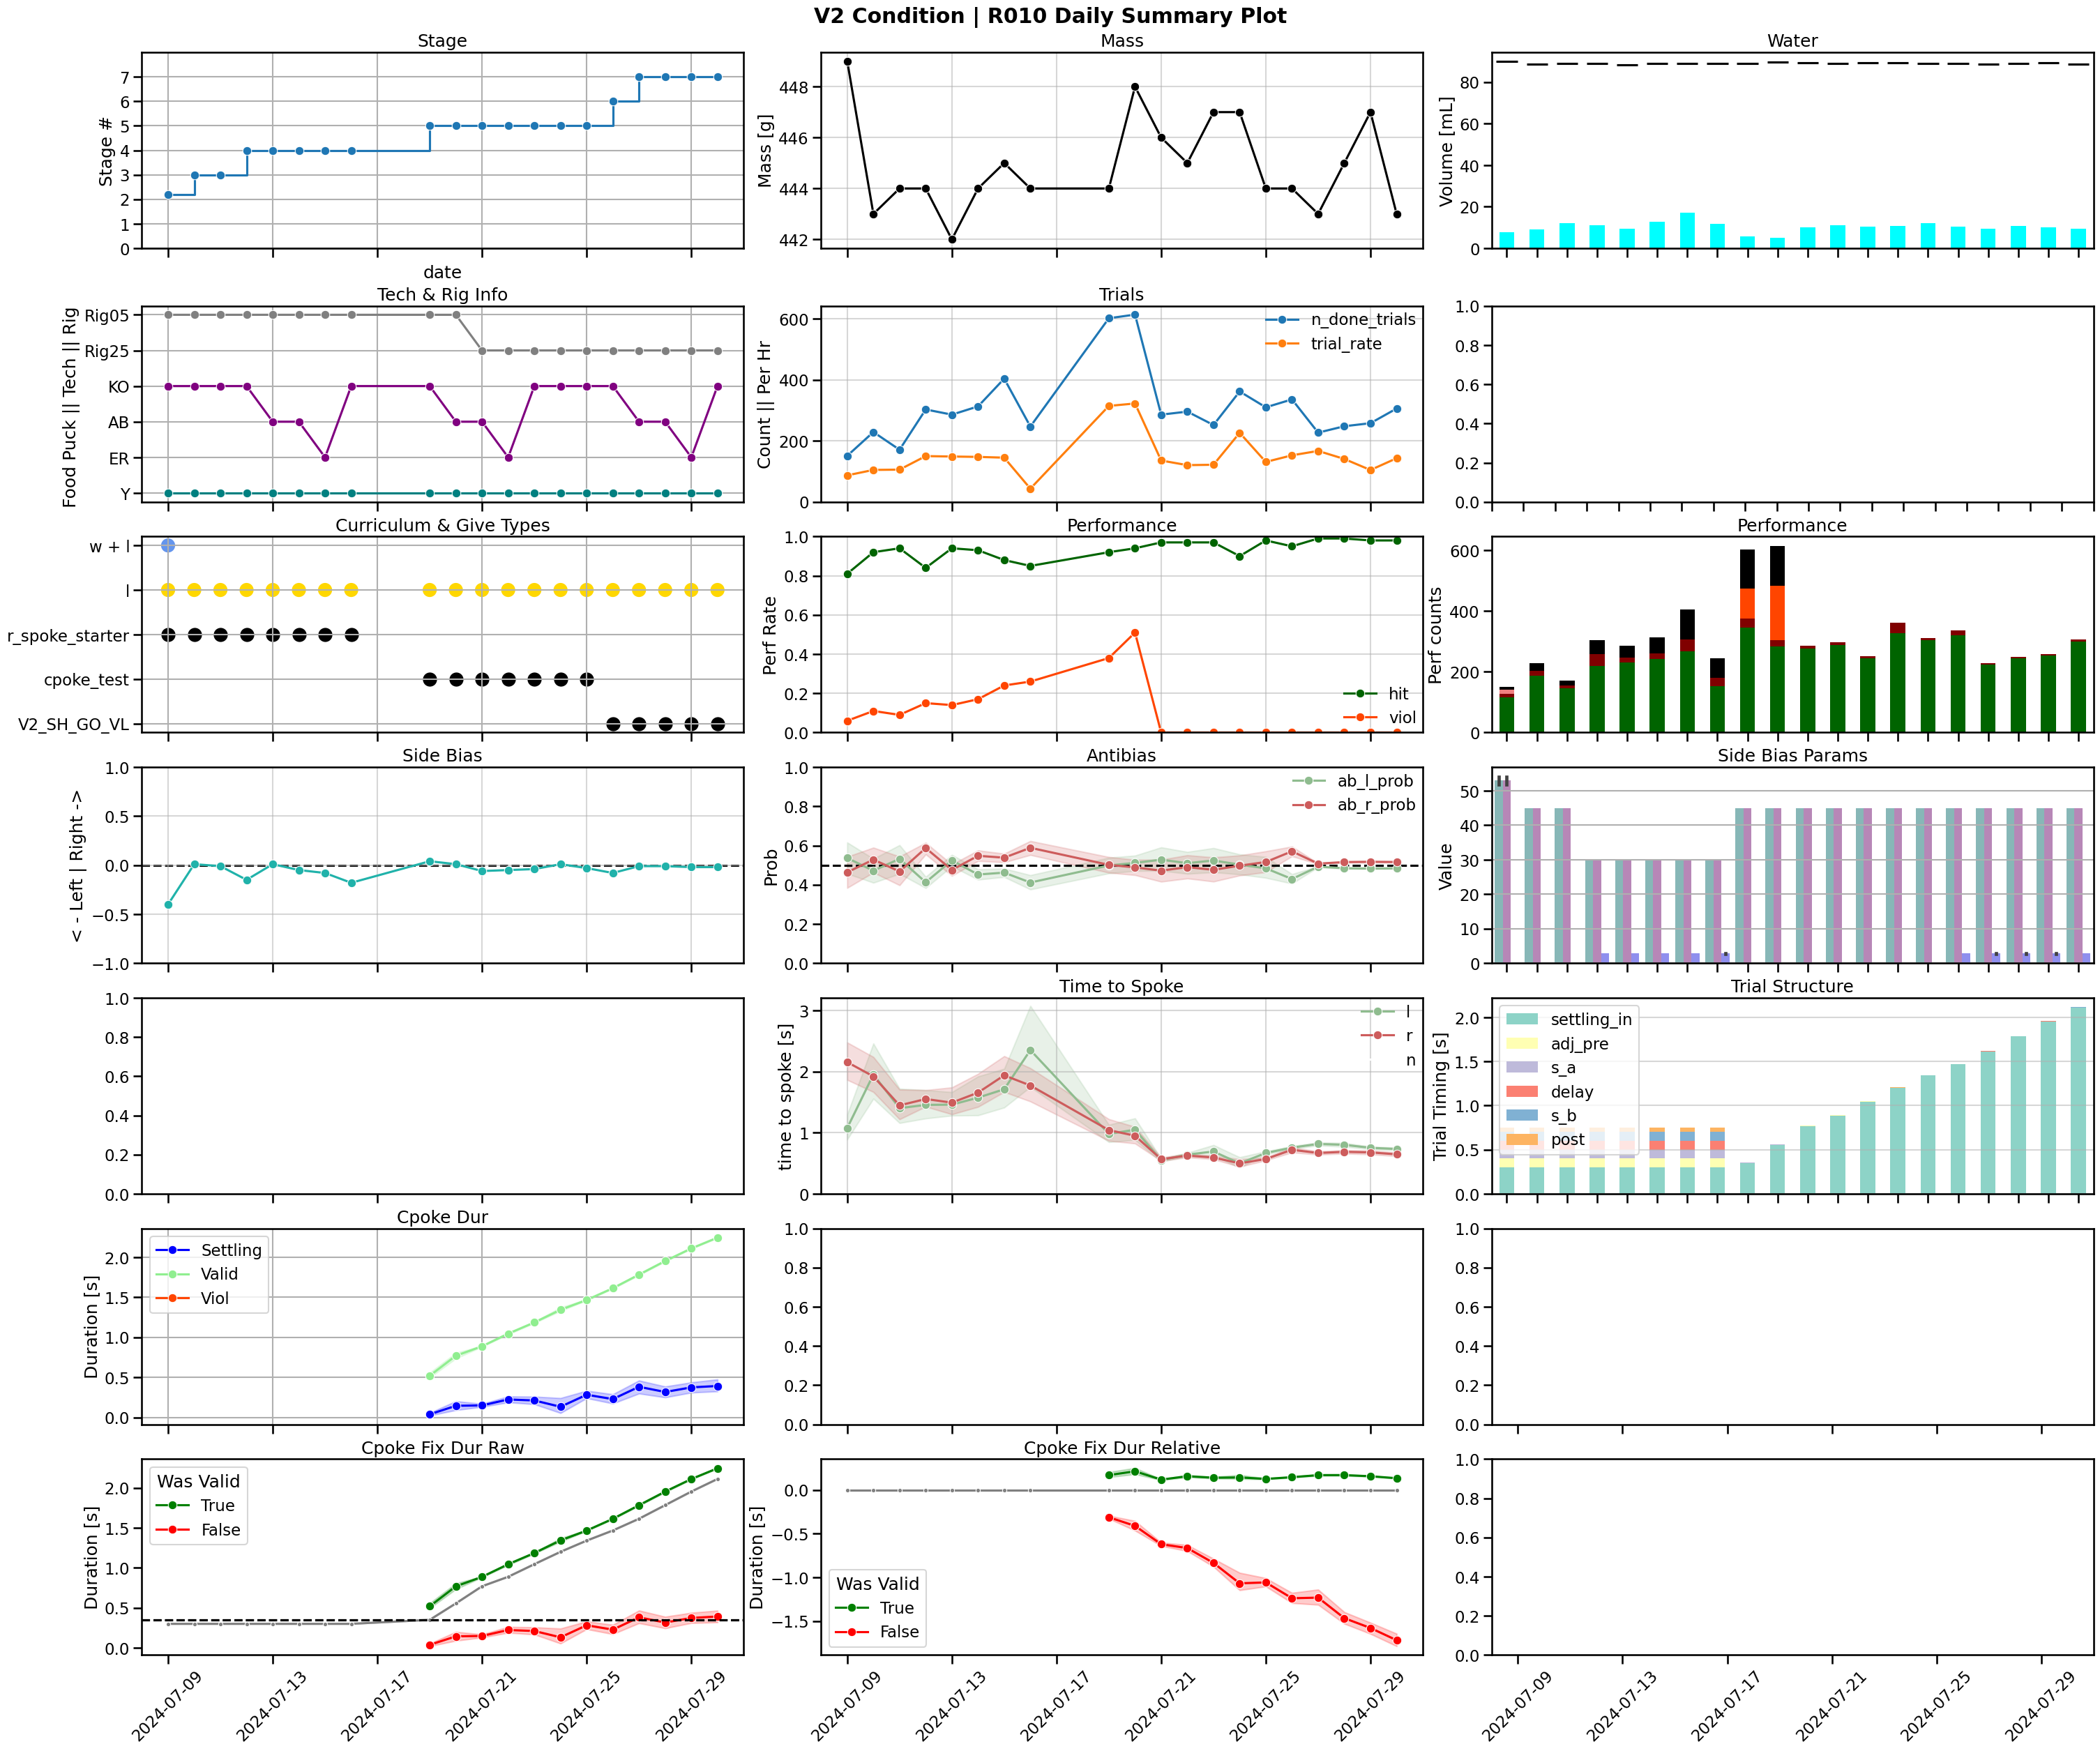

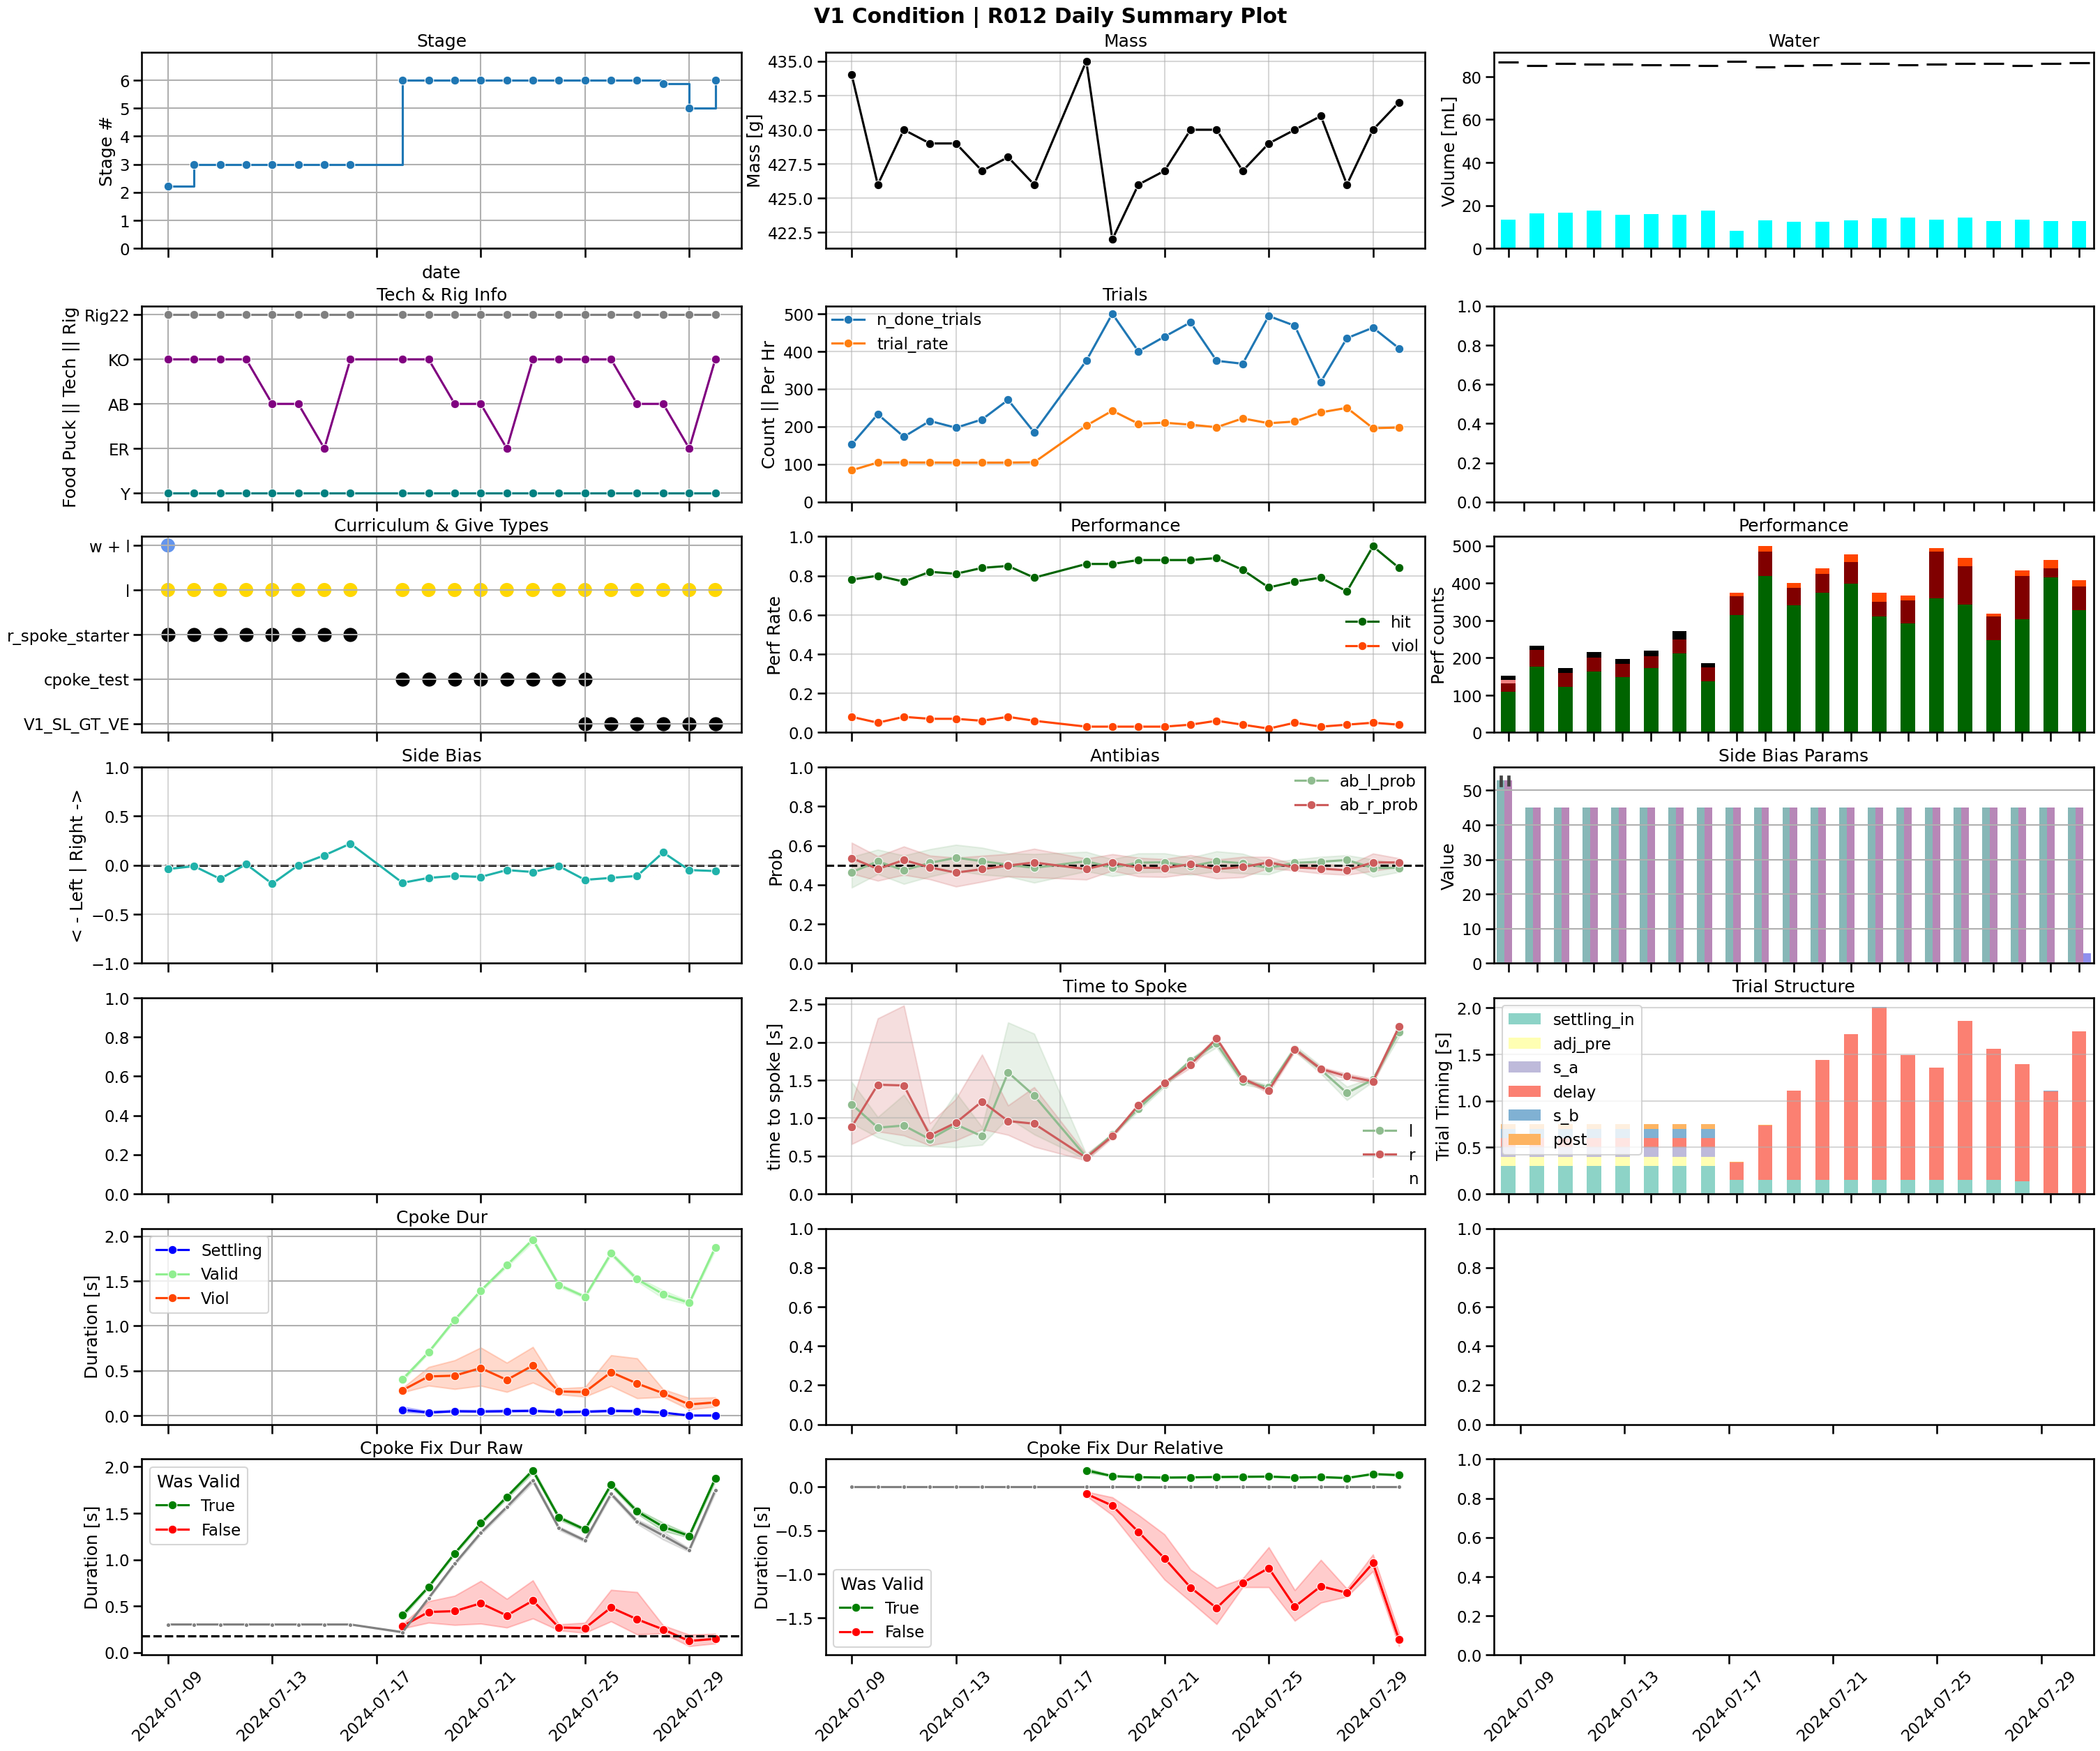

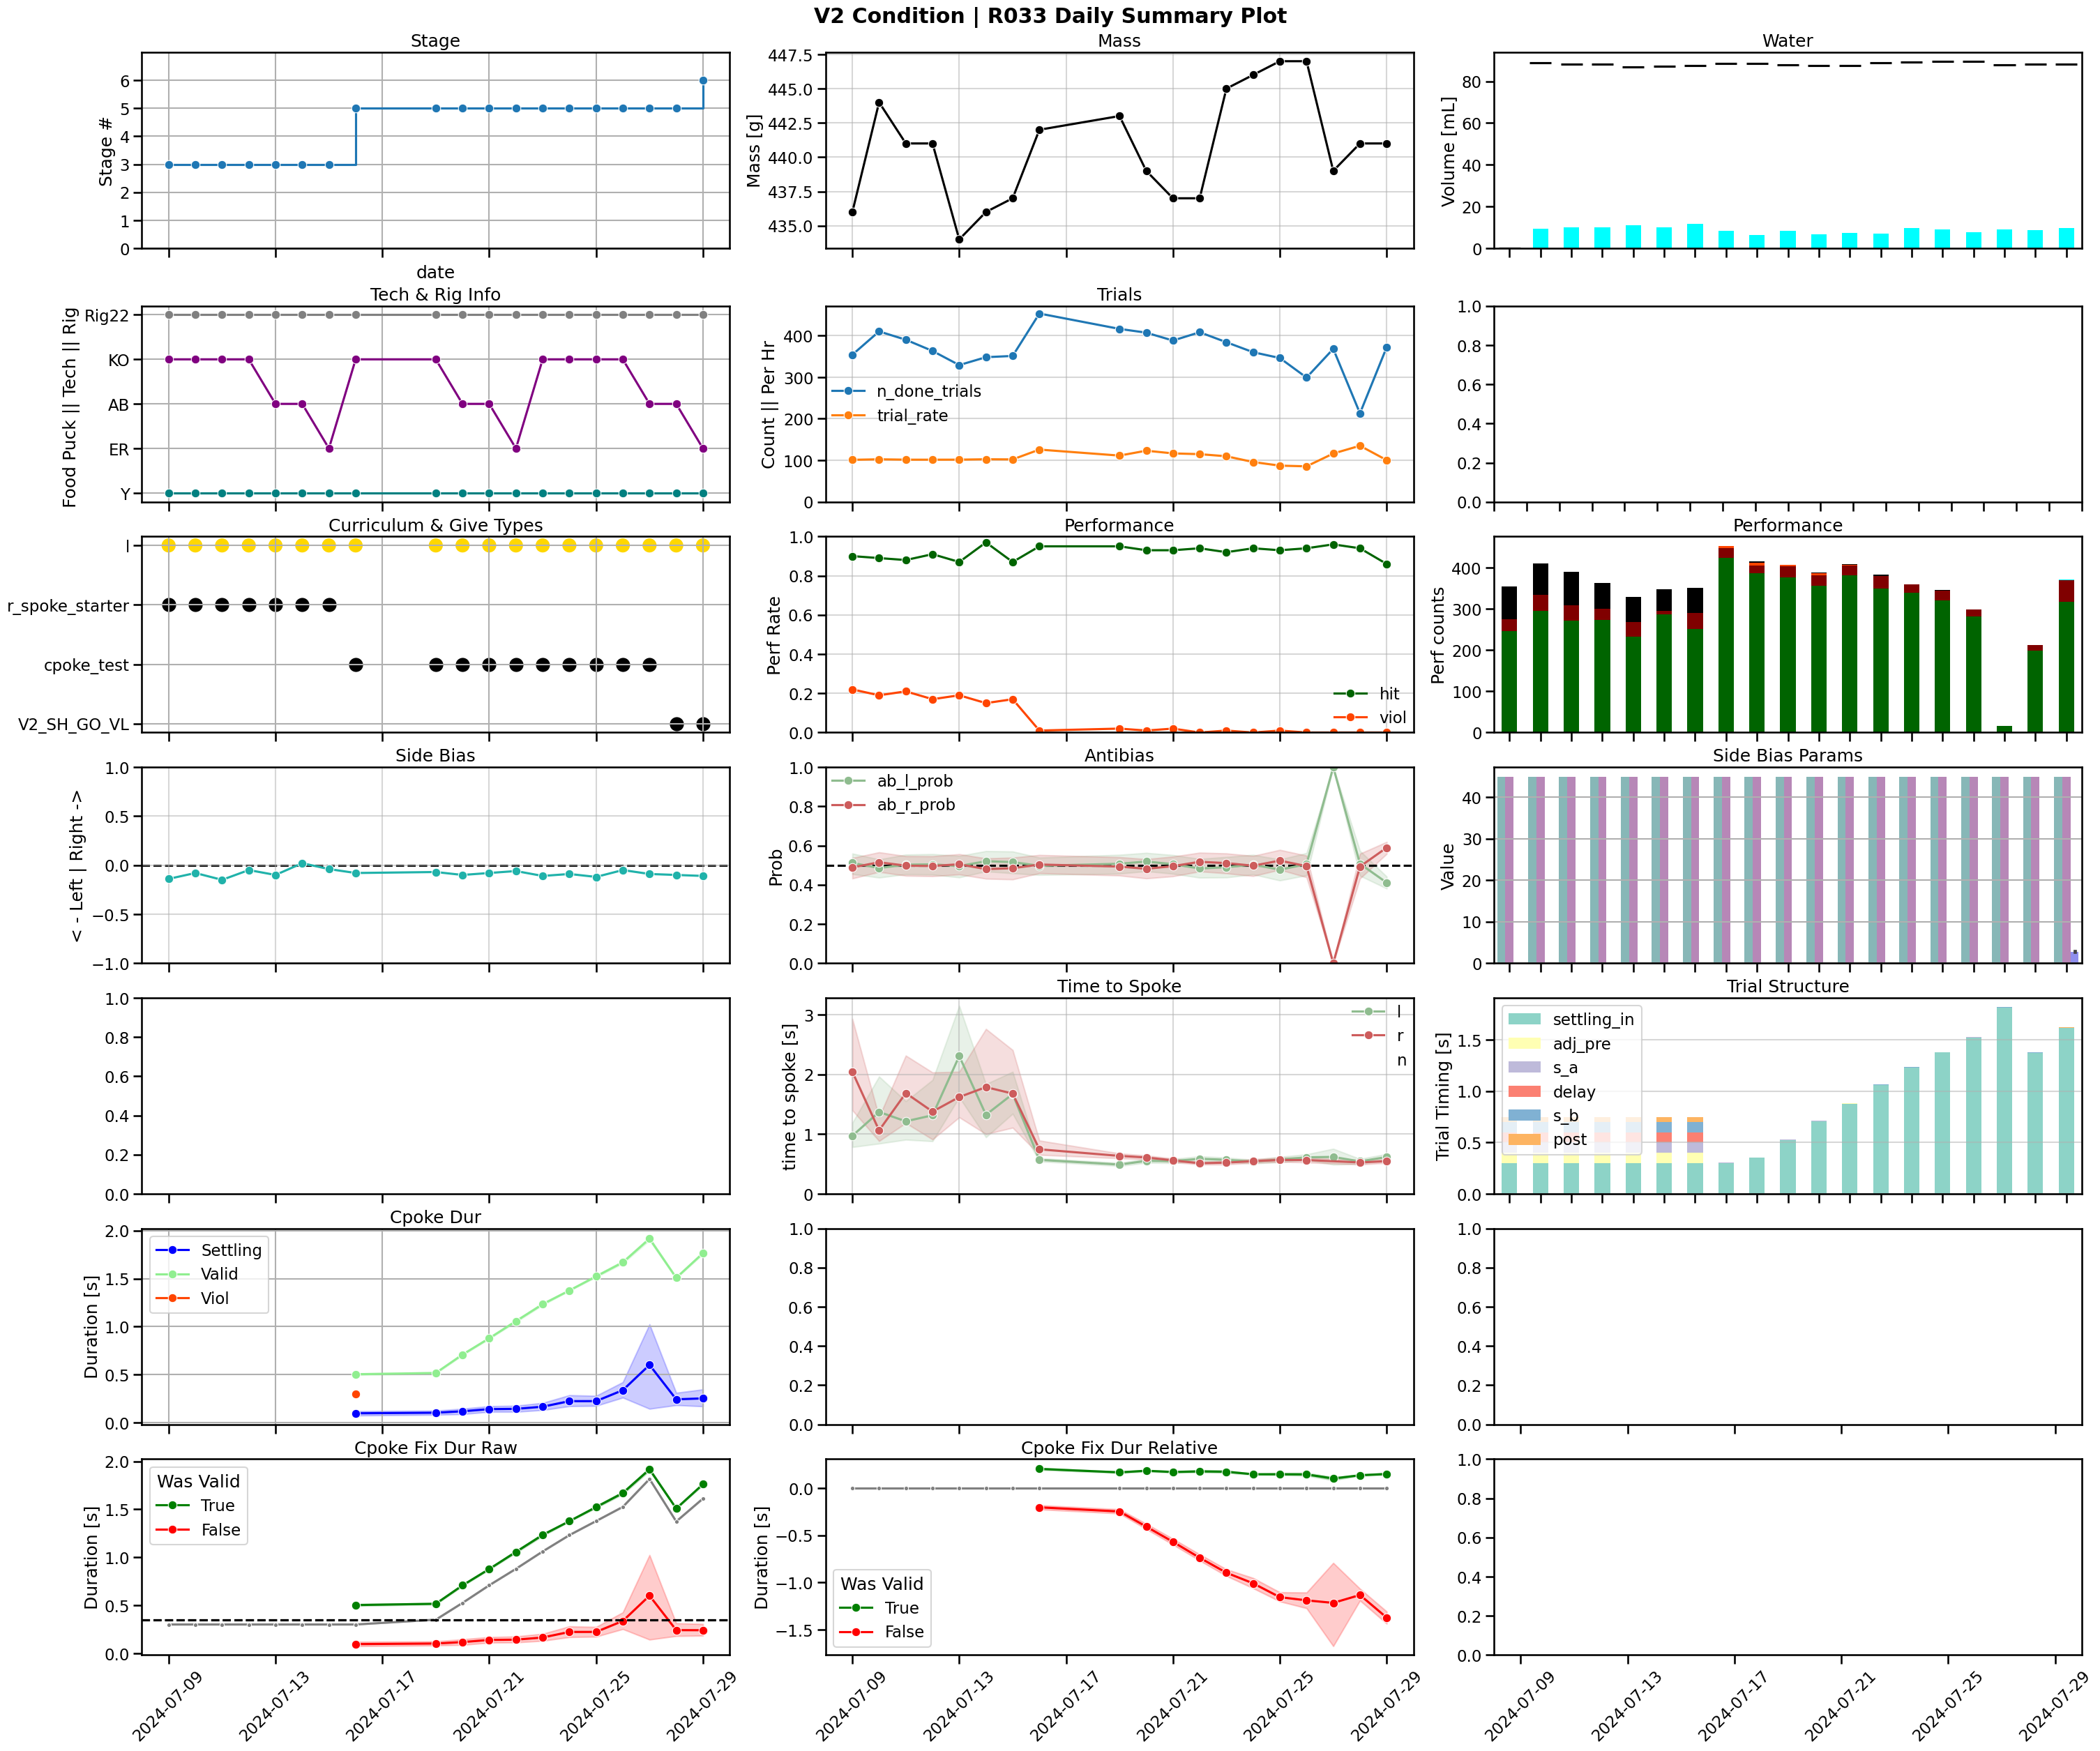

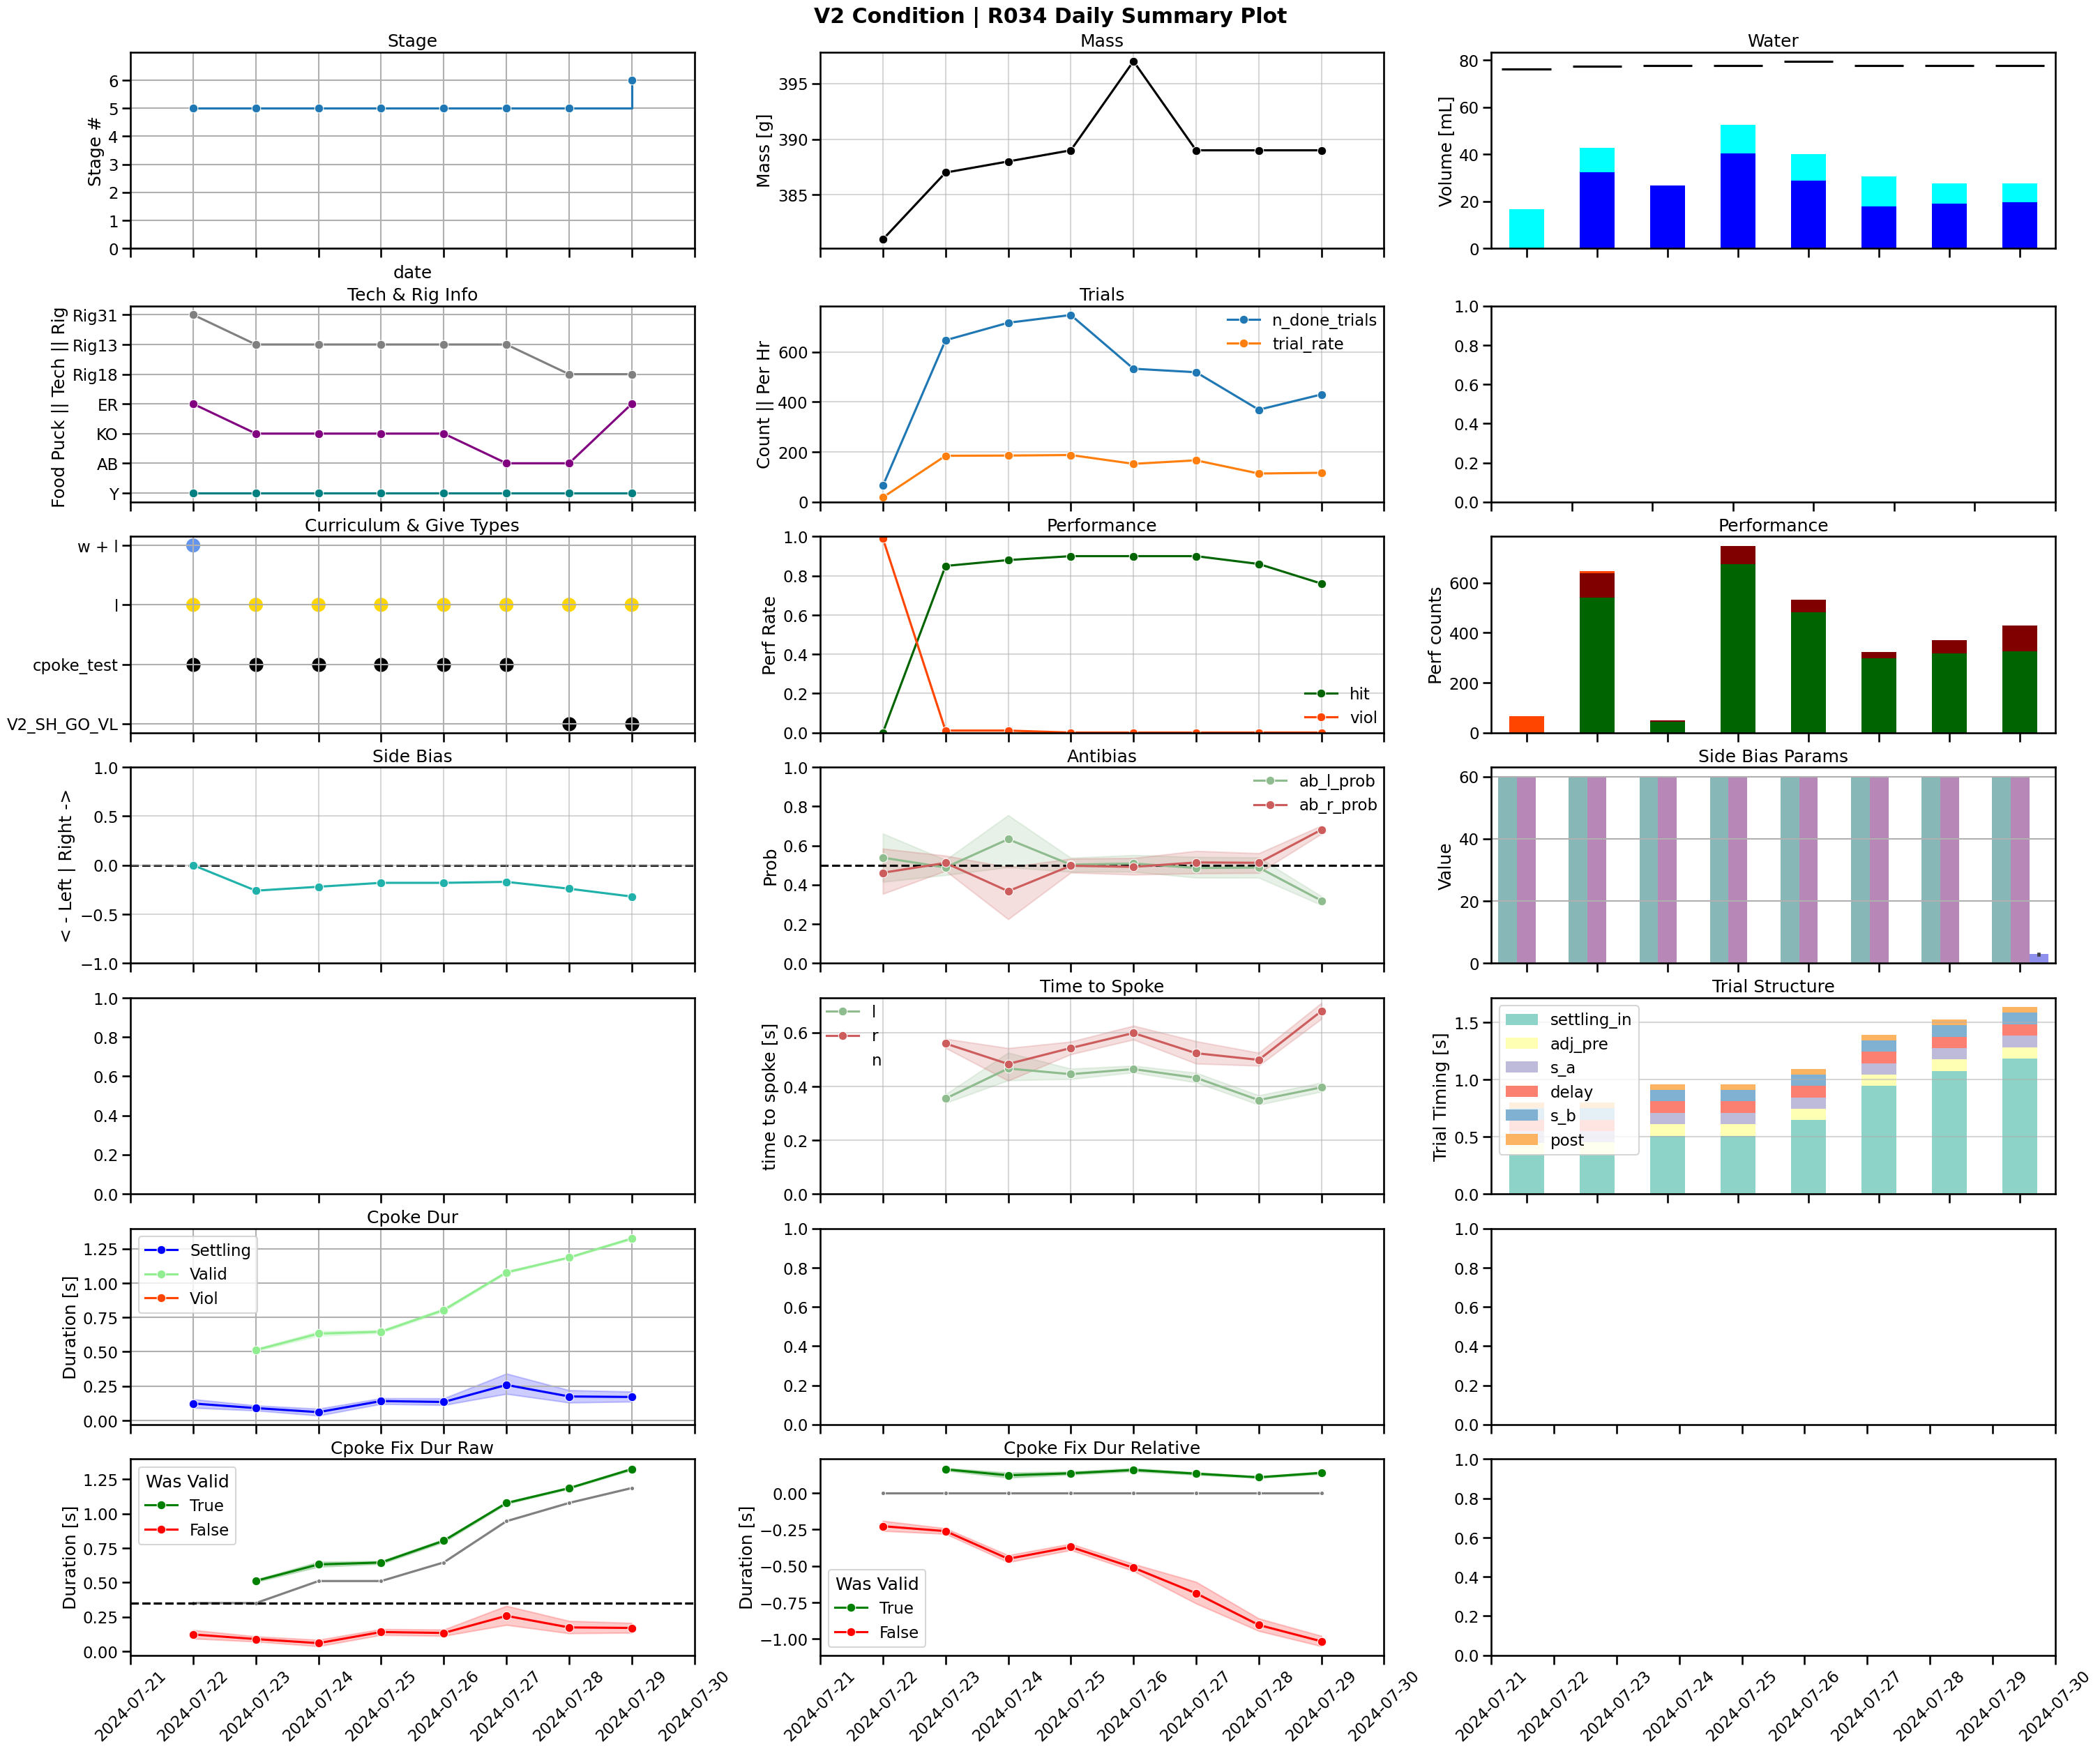

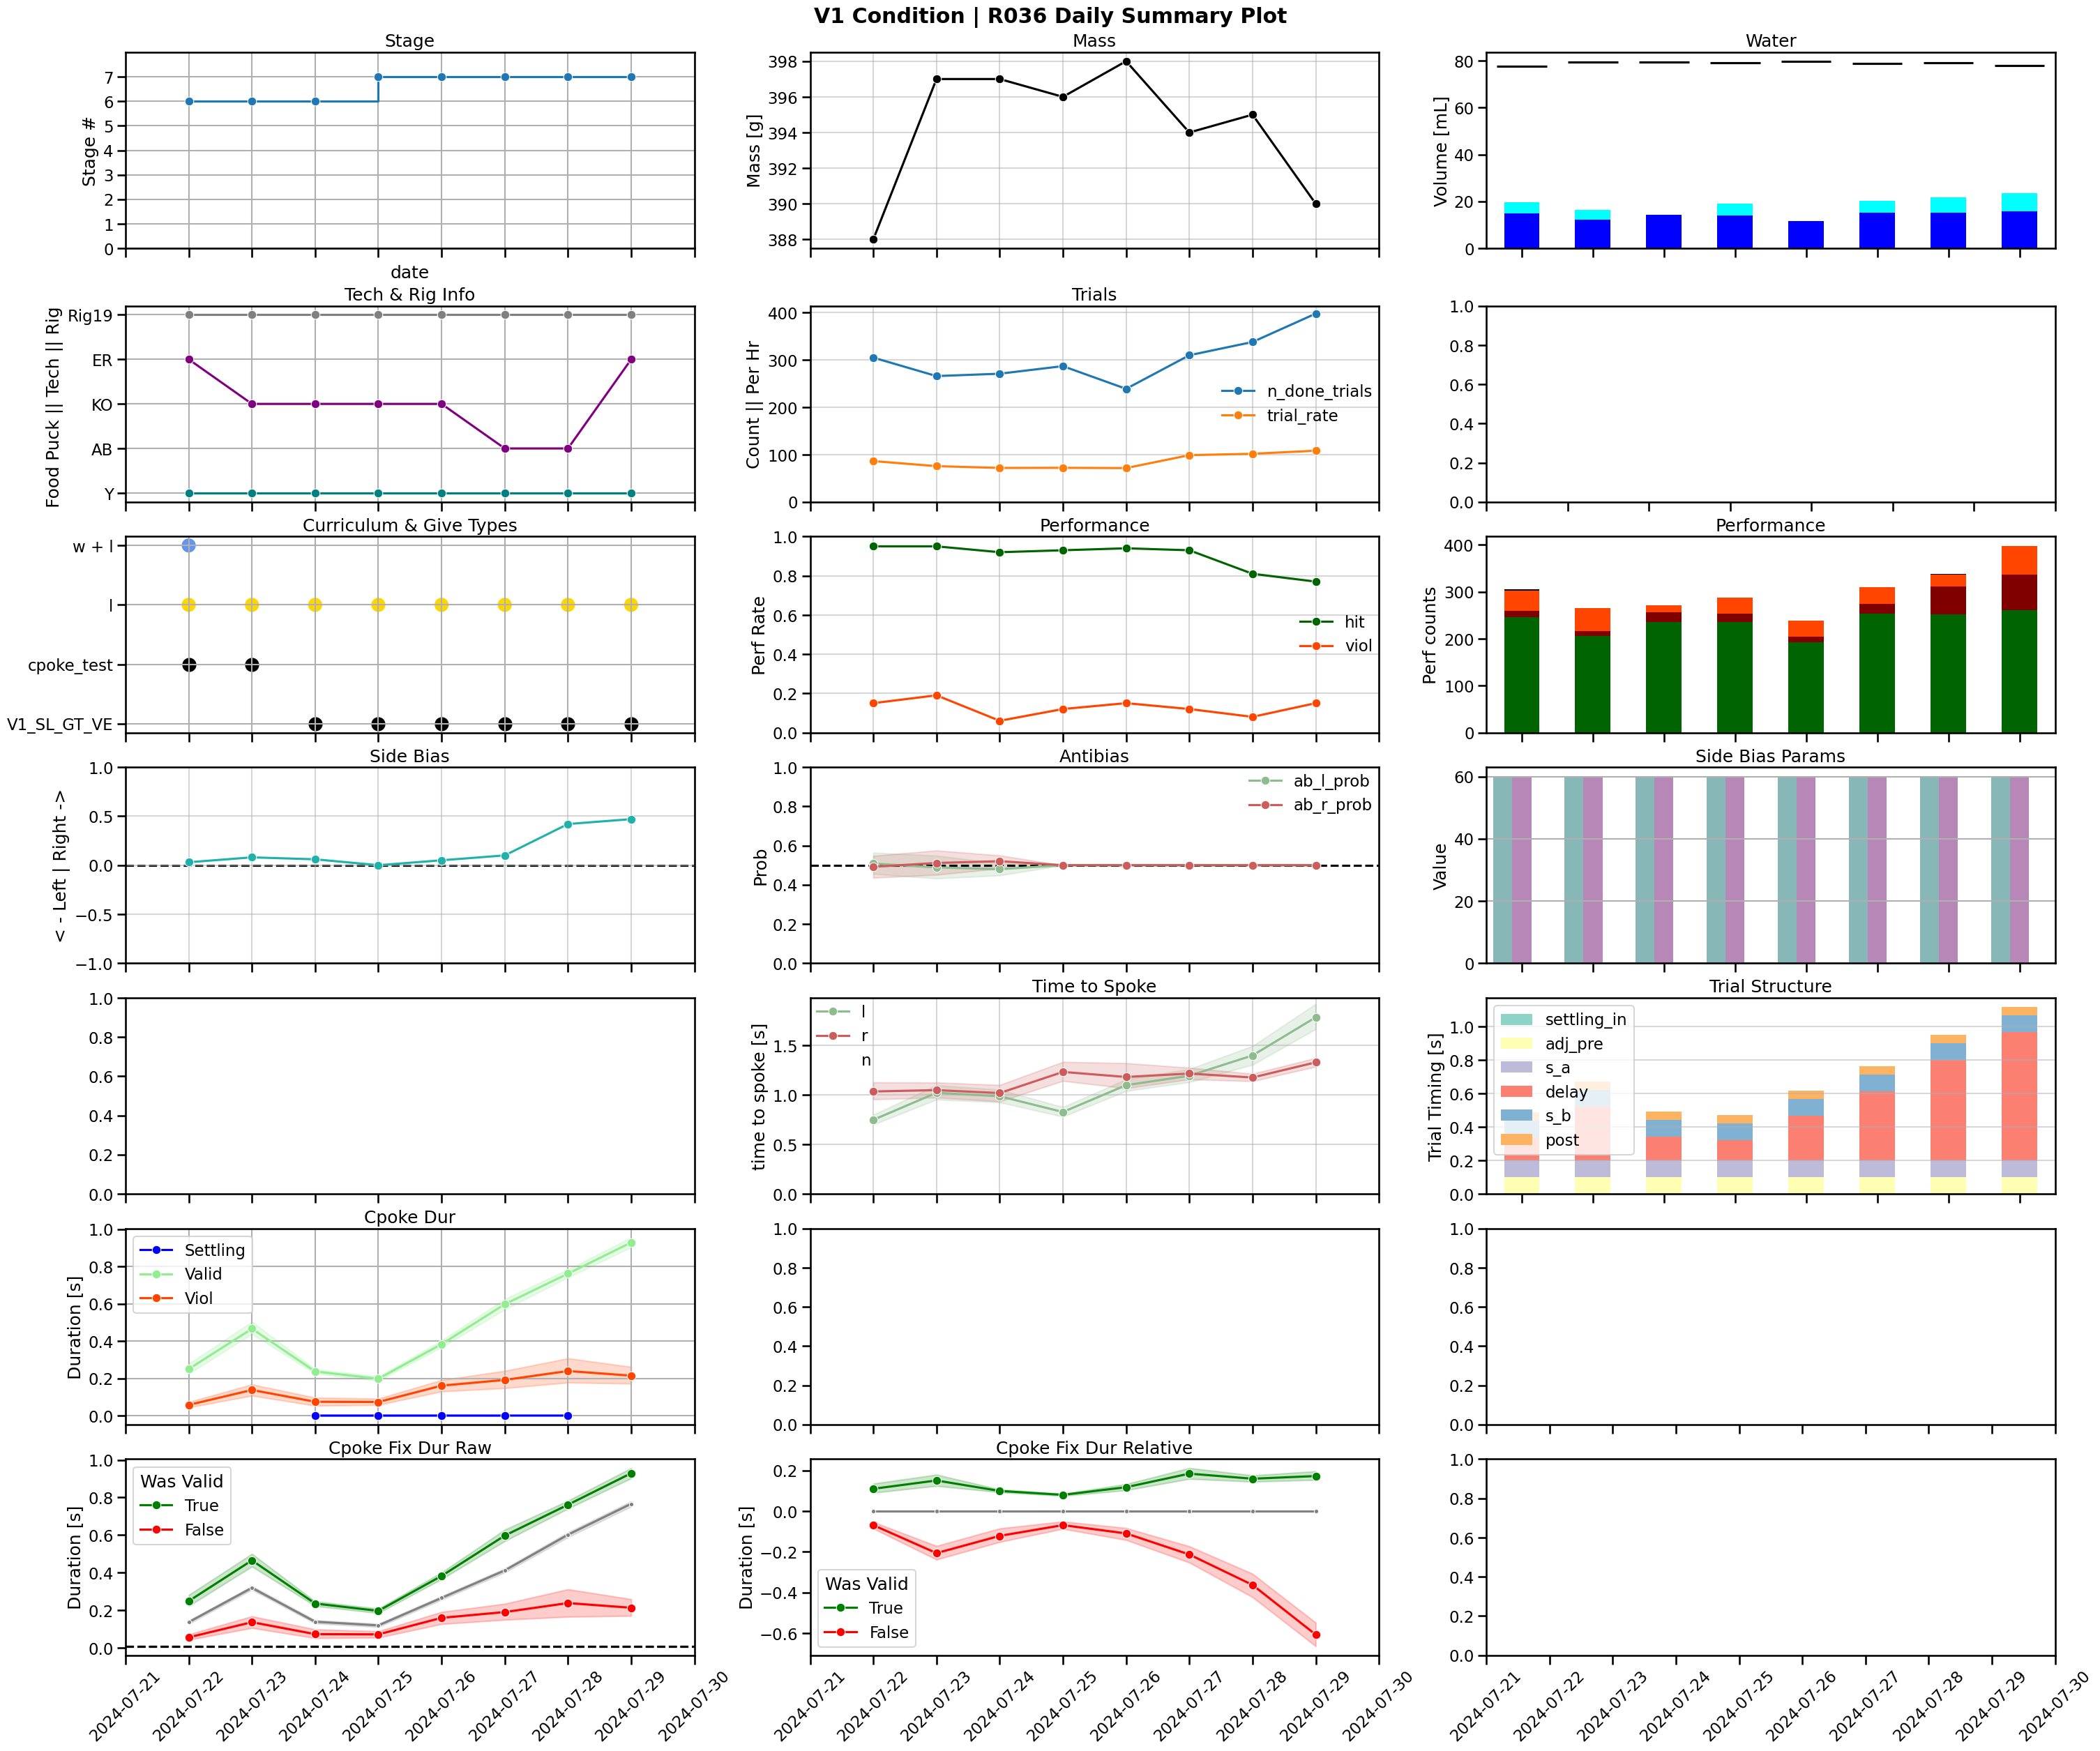

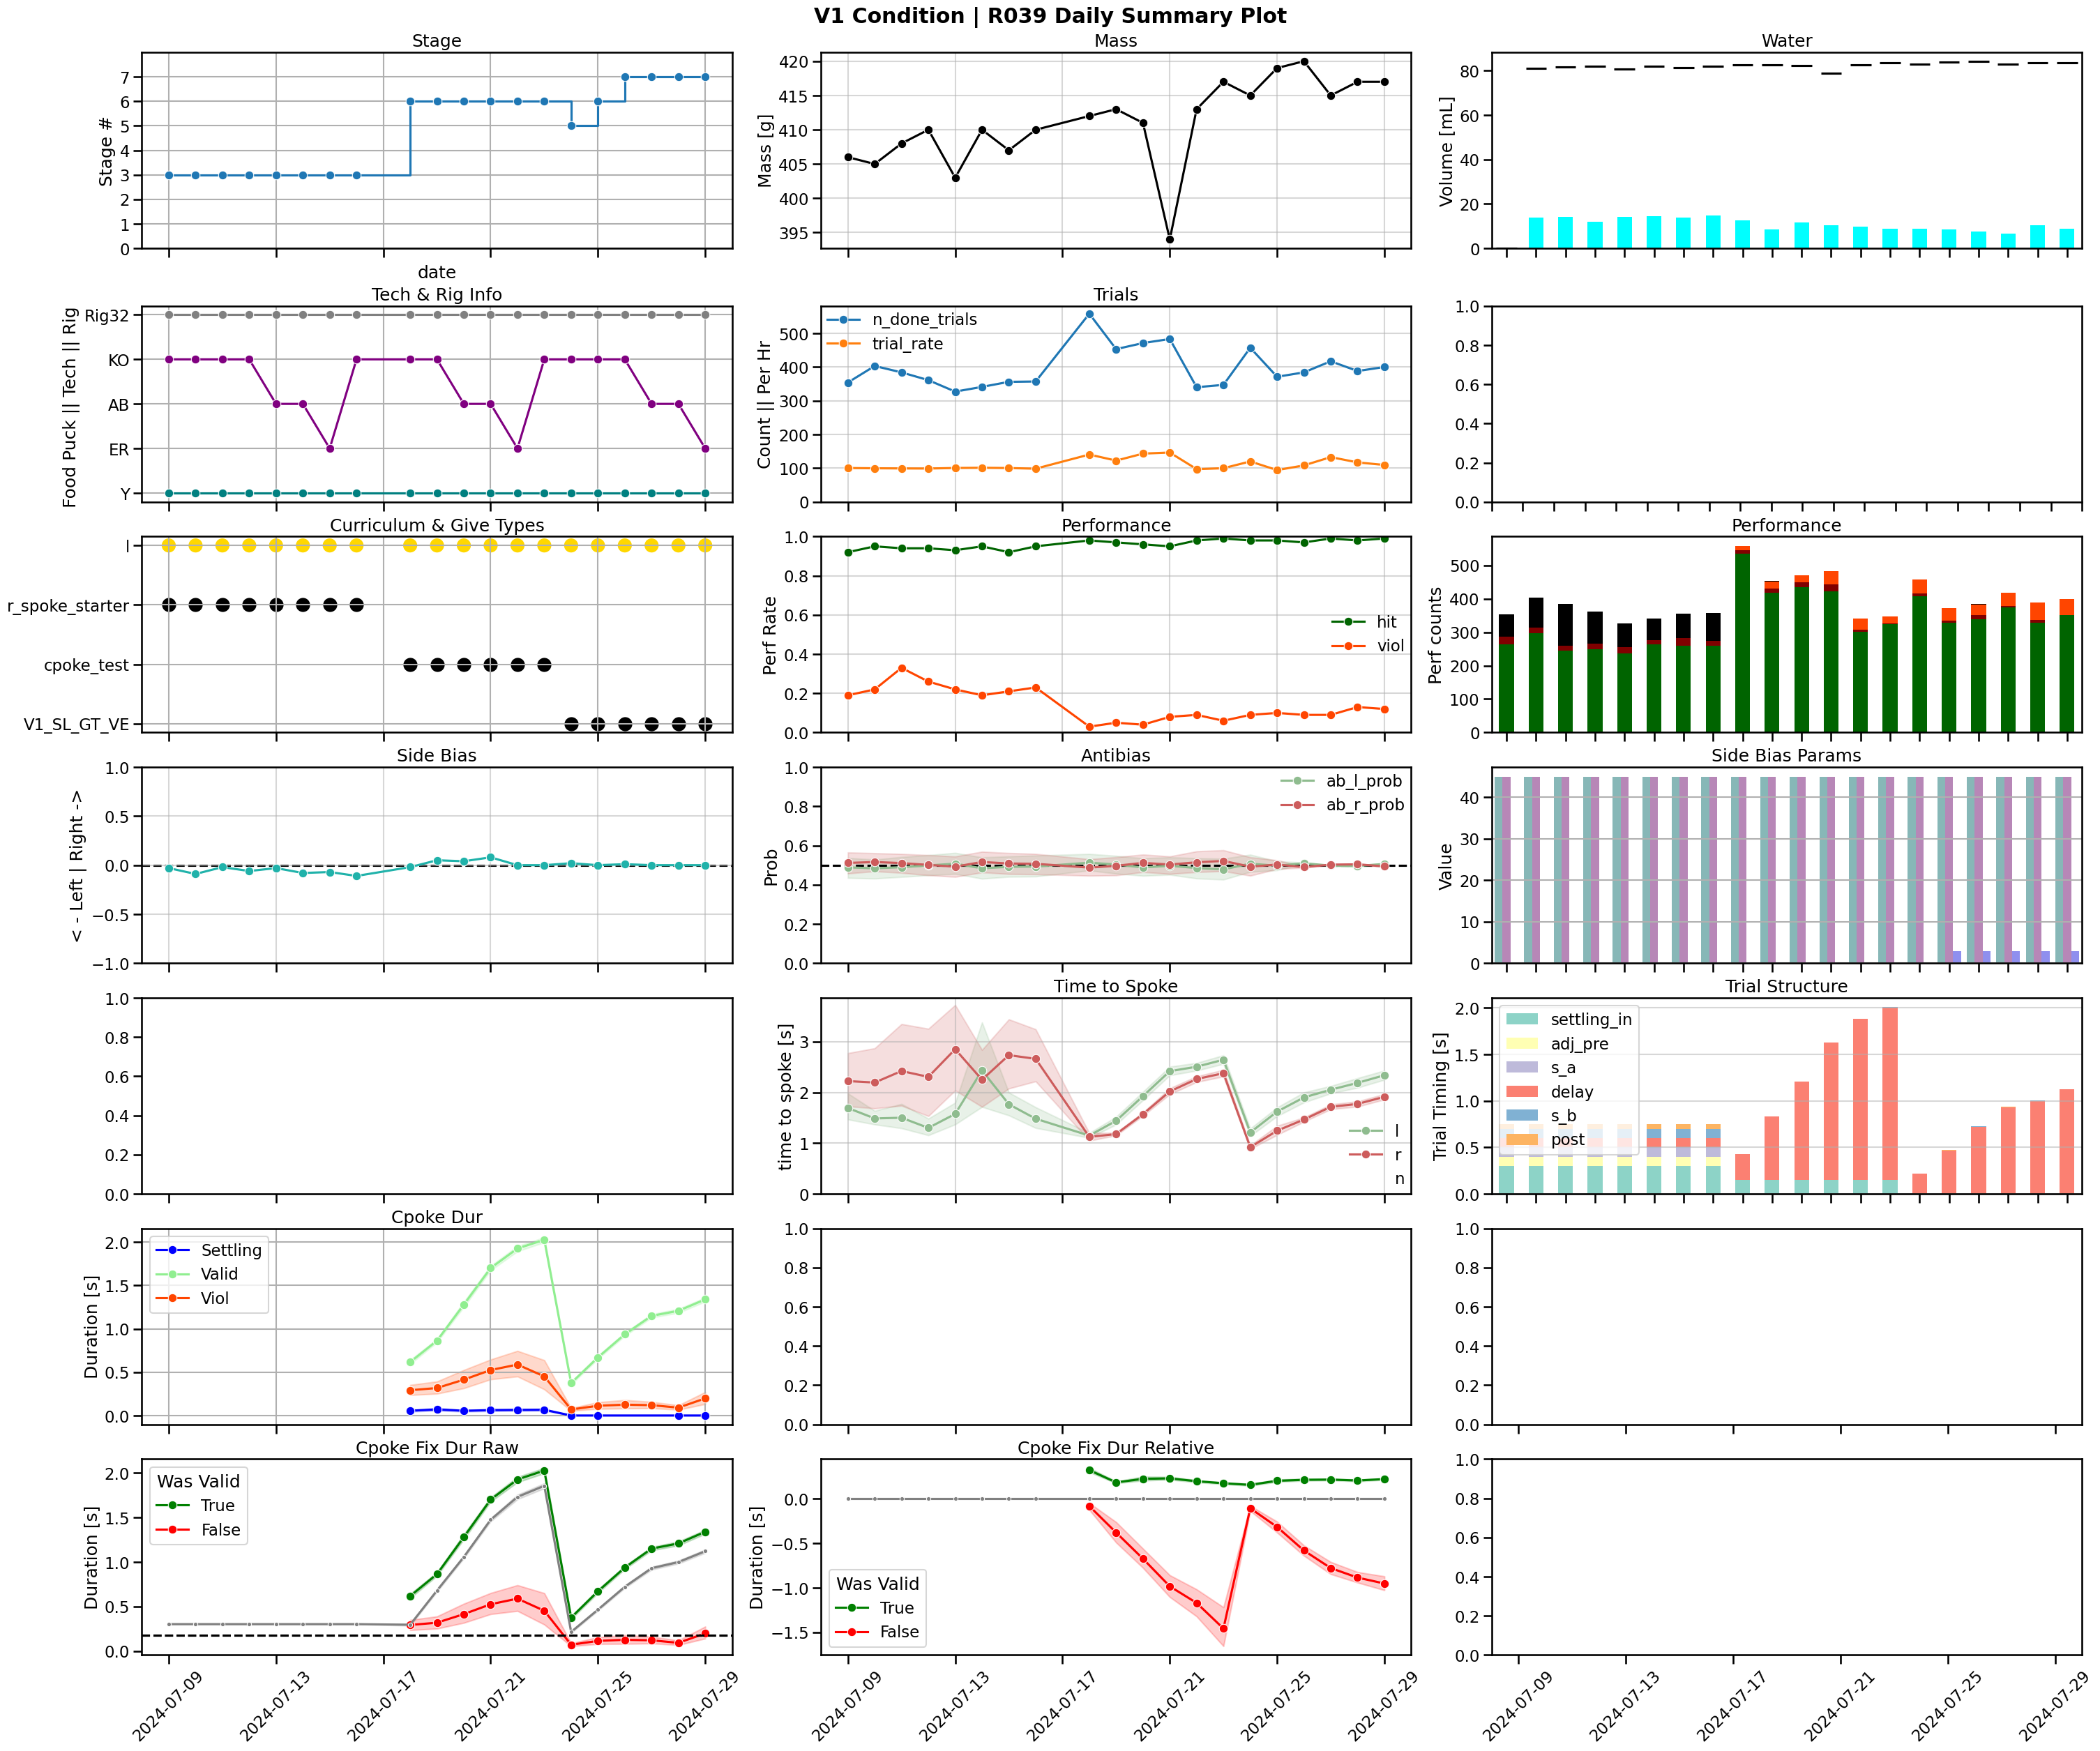

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    # if "animal_id" == "R036":
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [4]:
FIGURES_PATH

PosixPath('/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/beta_fixationgrower')

In [4]:
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R033_2024-07-29_day_summary
making R034_2024-07-29_day_summary
making R036_2024-07-29_day_summary
making R039_2024-07-29_day_summary
making R010_2024-07-30_day_summary
making R012_2024-07-30_day_summary
